In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Avogadro,Boltzmann

1. Initialization (position,velocity,Potential energy,steps, dt, constants, mass ,temp)
2. Calculate force and acceleration
3. update Position and velocity (Velocity Verlet algorithm)
4. Total Energy(KE + PE), Position ,momentum

In [94]:
#intialize
#initial pos
pos = np.array([1,5,10])


#time- step
dt = 0.01  # pico - sec

#number of steps
steps = 1000

#temperature 
temp =273

#Inert gas = Argon

mass = (39.95/Avogadro) *1e-3 #Kg
epsilon = 0.0104#eV
sigma = 3.40 #Å

In [95]:

def LJ_potential_energy(x,sigma = sigma , epsilon = epsilon):
    """Calculates the potential energy of the particle according to Lennard-Jones potential

    Args:
        x (float): the position of particle
        sigma (float, optional): the distance at which the interatomic potential energy between two atoms is zero. Defaults to sigma.
        epsilon (float, optional): the absolute value of the minimum of the potential energy. Defaults to epsilon.

    Returns:
        float: The potential energy at that point(eV)
    """
    #docstring is made with the help of autodocstring extension
    return 4*epsilon*( ((sigma/x)**12) - ((sigma/x)**6))

def LJ_Force(x,sigma = sigma , epsilon = epsilon): 
    """Calculates force at particle

    Args:
        x (float): Position
        sigma (float, optional): the distance at which the interatomic potential energy between two atoms is zero. Defaults to sigma.
        epsilon (float, optional): the absolute value of the minimum of the potential energy. Defaults to epsilon.

    Returns:
        float: Force at particle (eV/Å)
    """
    return 4*epsilon*((((12*np.power(sigma,12))/np.power(x,13)))-(((6*np.power(sigma,6))/np.power(x,7))))

In [96]:

acc_x = np.zeros((pos.size,pos.size))
acc_x
for i in range(pos.size -1):
    for j in range(i+1,pos.size):
        r_ij = pos[j] - pos[i]
        r_mag = np.sqrt(r_ij * r_ij)
        f_scalar = LJ_Force(r_mag)
        force = f_scalar*(r_ij/r_mag)
        acc_x[i,j] = (force/mass)*1.602e-23 #in Å/picosec^2
        acc_x[j,i] = -acc_x[i,j]


In [97]:
acc_x

array([[ 0.        , -1.39637364, -0.01935463],
       [ 1.39637364,  0.        , -0.95618637],
       [ 0.01935463,  0.95618637,  0.        ]])

In [98]:
np.sum(acc_x ,axis = 0)

array([ 1.41572828, -0.44018728, -0.975541  ])

In [99]:
def get_acc(pos, epsilon = epsilon, sigma = sigma,mass = mass):
    """in Å/picosec^2"""
    acc_x = np.zeros((pos.size,pos.size))
    for i in range(pos.size -1):
        for j in range(i+1,pos.size):
            r_ij = pos[j] - pos[i]
            r_mag = np.sqrt(r_ij * r_ij)
            f_scalar = LJ_Force(r_mag)
            force = f_scalar*(r_ij/r_mag)
            acc_x[i,j] = (force/mass)*1.602e-23 #in Å/picosec^2
            acc_x[j,i] = -acc_x[i,j]
    return np.sum(acc_x,axis=0)

In [100]:
# Boltzman in J/K

def init_vel(pos,temp =temp,mass =mass):
    """ Å/picosec"""    
    randnum = np.random.rand((pos.size)) - 0.5
    vel_x = randnum*np.sqrt((Boltzmann*temp*1e-4)/mass)
    return vel_x

## Update Velocity and Position

In [101]:

Pos_steps = np.zeros((steps, pos.size))
vel_steps = np.zeros((steps, pos.size))

vel = init_vel(pos)
acc = get_acc(pos)

vel_half = np.zeros((pos.size))
newpos = np.zeros((pos.size))
newvel = np.zeros((pos.size))
newacc = np.zeros((pos.size))

for i in range(steps):
    vel_half = vel + 0.5*acc*dt
    newpos = pos+vel_half*dt
    newacc = get_acc(newpos)
    newvel = vel_half + 0.5*newacc*dt
    Pos_steps[i,:] = newpos
    vel_steps[i,:] = newvel
    vel = newvel
    pos = newpos
    acc = newacc

# Pos_steps
vel_steps

array([[ 0.29175477, -0.87466033, -0.88631891],
       [ 0.30516832, -0.87831412, -0.89607868],
       [ 0.31802685, -0.88140917, -0.90584215],
       ...,
       [-0.27825181, -0.40607308, -0.78489958],
       [-0.26701378, -0.39962529, -0.80258541],
       [-0.25575943, -0.393173  , -0.82029204]], shape=(1000, 3))

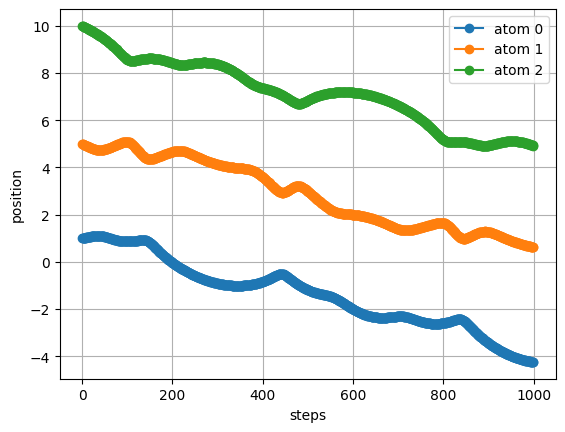

In [102]:
for i in range(Pos_steps.shape[1]):
    plt.plot(Pos_steps[:,i], marker = 'o', label = 'atom {}'.format(i))
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()
plt.grid()
plt.show()

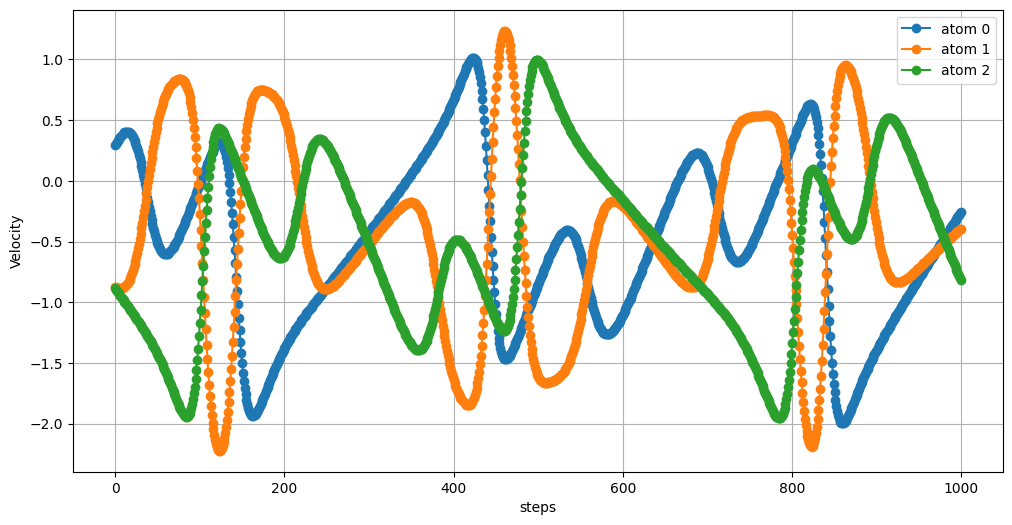

In [103]:
plt.figure(figsize=(12,6))
for i in range(vel_steps.shape[1]):
    plt.plot(vel_steps[:,i], marker = 'o', label = 'atom {}'.format(i))
plt.xlabel('steps')
plt.ylabel('Velocity')
plt.legend()
plt.grid()
plt.show()

In [104]:
def Kinetic_Energy(v, m=mass):
    """Calculates KE

    Args:
        v (float): velocity of particle
        m (float, optional): mass of atom. Defaults to m.

    Returns:
        float: KE (eV)
    """

    ke = np.zeros(v.shape)
    for i  in range(v.shape[0]):
        ke[i,:] = ((m*np.pow(v[i,:],2))*10**23)/(2*1.602)
    return ke

In [105]:
# vel_steps[1,:]
ke = Kinetic_Energy(vel_steps)

In [106]:
# ke_system = np.zeros(ke.shape[0])
# for i in range(ke.shape[0]):
#     ke_system[i] = np.sum(ke[i])
ke_system  = np.sum(ke, axis=1)

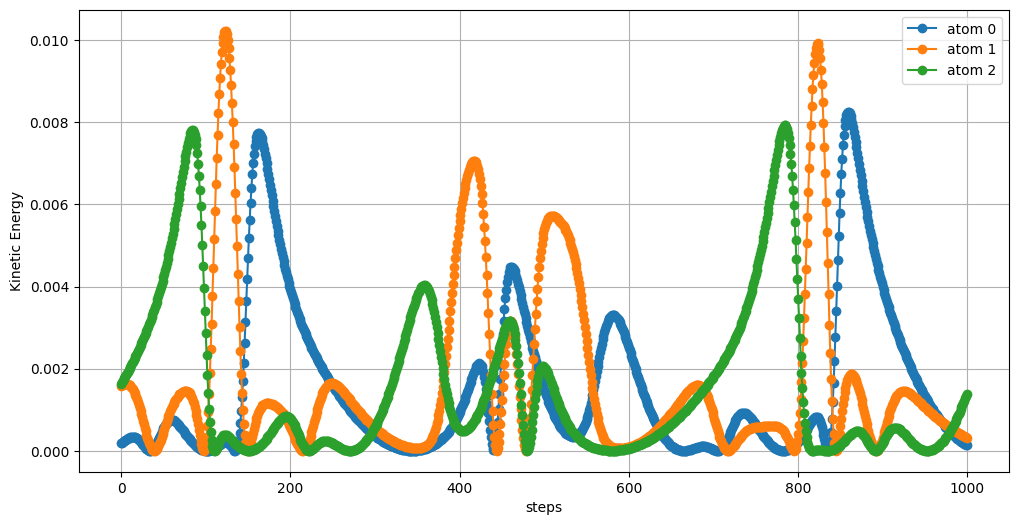

In [107]:
plt.figure(figsize=(12,6))
for i in range(ke.shape[1]):
    plt.plot(ke[:,i], marker = 'o', label = 'atom {}'.format(i))
plt.xlabel('steps')
plt.ylabel('Kinetic Energy')
plt.legend()
plt.grid()
plt.show()

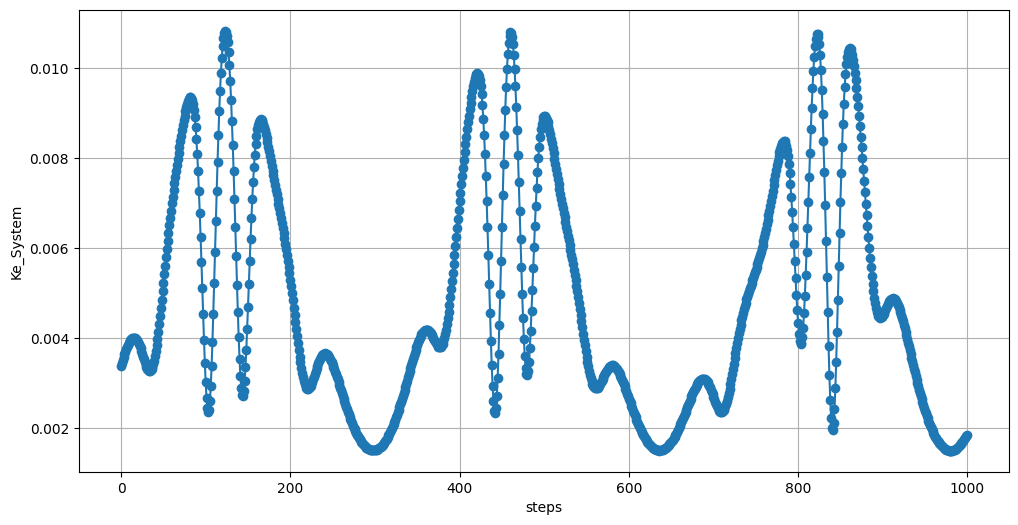

In [108]:
plt.figure(figsize=(12,6))
plt.plot(ke_system, marker = 'o',)
plt.xlabel('steps')
plt.ylabel('Ke_System')
plt.grid()
plt.show()

In [109]:
# Pos_steps
Pe = np.zeros(Pos_steps.shape)
for i in range(Pos_steps.shape[0]):
    for j in range(pos.size):
        for k in range(pos.size):
            if j!=k:
                rjk = Pos_steps[i,j] - Pos_steps[i,k]
                Pe[i,j] += LJ_potential_energy(rjk)

Pe

array([[-0.00995947, -0.01354457, -0.00382811],
       [-0.01002478, -0.01360948, -0.00382966],
       [-0.01008827, -0.01367281, -0.00383148],
       ...,
       [-0.00438557, -0.01194842, -0.0077788 ],
       [-0.00439191, -0.01198274, -0.00780752],
       [-0.00439849, -0.01201907, -0.00783804]], shape=(1000, 3))

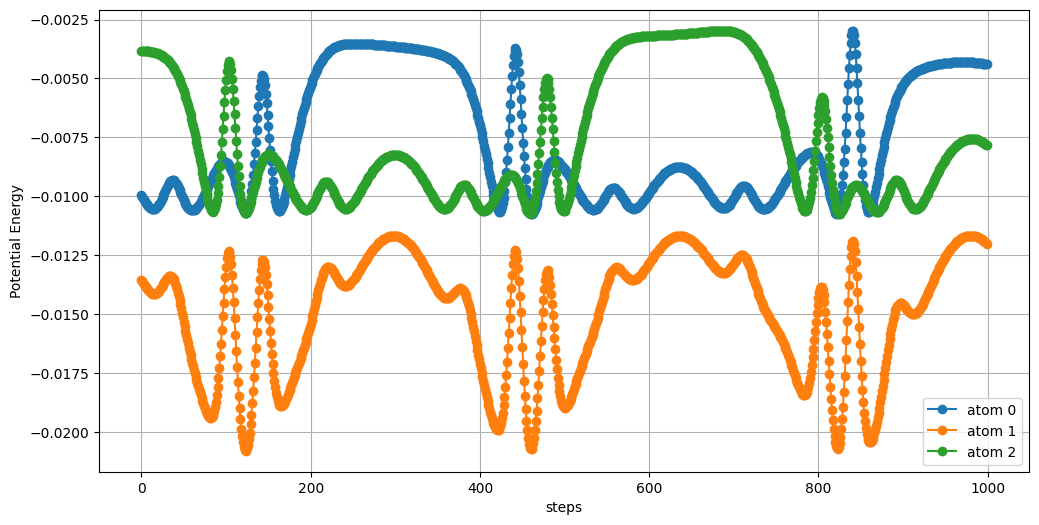

In [110]:
plt.figure(figsize=(12,6))
for i in range(Pe.shape[1]):
    plt.plot(Pe[:,i], marker = 'o', label = 'atom {}'.format(i))
plt.xlabel('steps')
plt.ylabel('Potential Energy')
plt.legend()
plt.grid()
plt.show()

In [111]:
pe_system = np.sum(Pe,axis= 1)
pe_system

array([-0.02733215, -0.02746392, -0.02759257, -0.02771732, -0.02783736,
       -0.02795181, -0.02805977, -0.02816028, -0.02825236, -0.02833502,
       -0.02840726, -0.0284681 , -0.02851659, -0.02855185, -0.02857308,
       -0.02857961, -0.02857093, -0.02854674, -0.02850697, -0.02845183,
       -0.02838189, -0.02829807, -0.02820168, -0.02809449, -0.02797869,
       -0.02785693, -0.02773228, -0.02760819, -0.02748847, -0.02737715,
       -0.02727841, -0.02719647, -0.02713542, -0.0270991 , -0.02709097,
       -0.02711394, -0.02717029, -0.02726155, -0.02738844, -0.02755089,
       -0.02774798, -0.02797806, -0.02823877, -0.02852721, -0.02884002,
       -0.02917354, -0.02952396, -0.02988744, -0.03026024, -0.03063884,
       -0.03101999, -0.03140083, -0.03177887, -0.03215207, -0.03251878,
       -0.03287779, -0.03322825, -0.03356969, -0.0339019 , -0.03422495,
       -0.03453913, -0.03484487, -0.0351427 , -0.03543321, -0.03571703,
       -0.03599473, -0.03626679, -0.03653361, -0.0367954 , -0.03

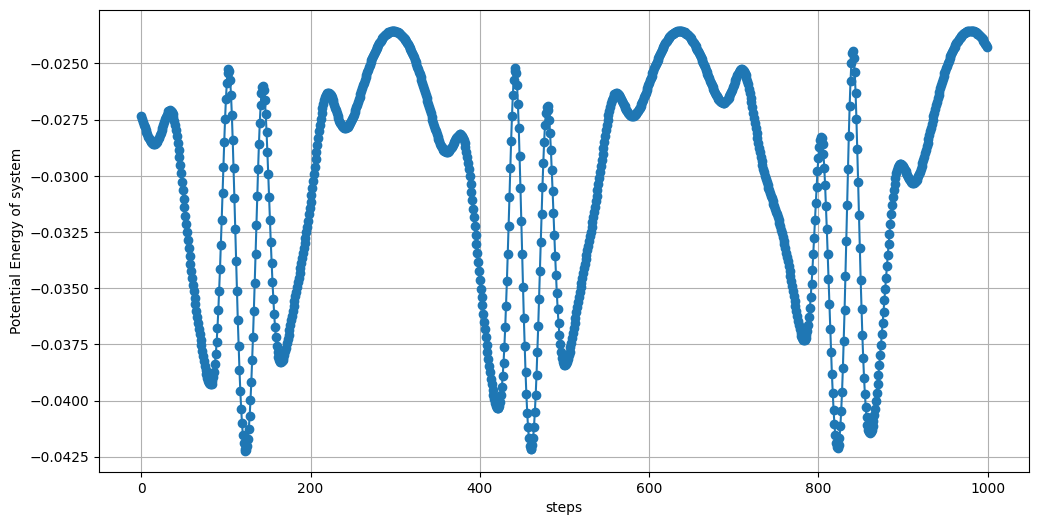

In [112]:
plt.figure(figsize=(12,6))
plt.plot(pe_system, marker = 'o')
plt.xlabel('steps')
plt.ylabel('Potential Energy of system')
plt.grid()
plt.show()

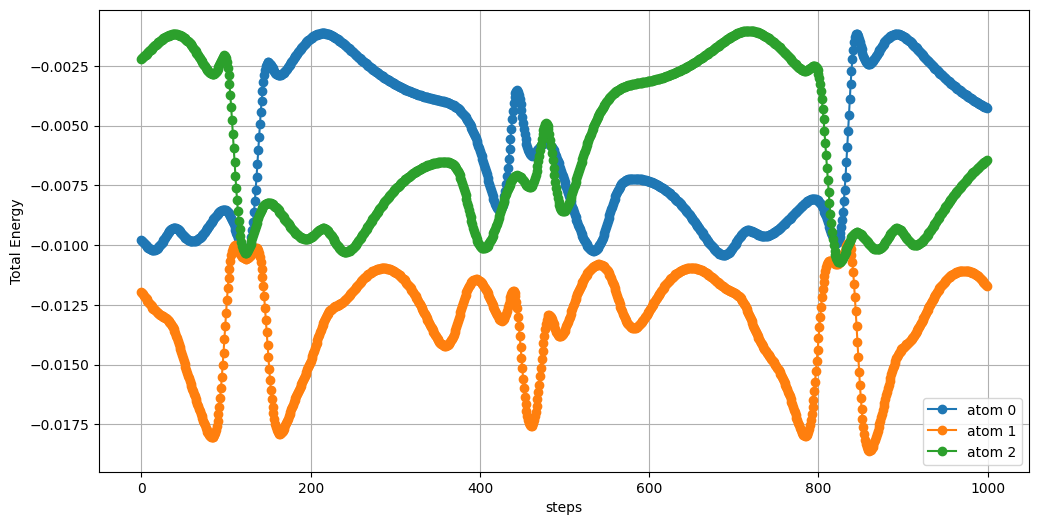

In [113]:
TotE = Pe + ke
plt.figure(figsize=(12,6))
for i in range(TotE.shape[1]):
    plt.plot(TotE[:,i], marker = 'o', label = 'atom {}'.format(i))
plt.xlabel('steps')
plt.ylabel('Total Energy')
plt.legend()
plt.grid()
plt.show()

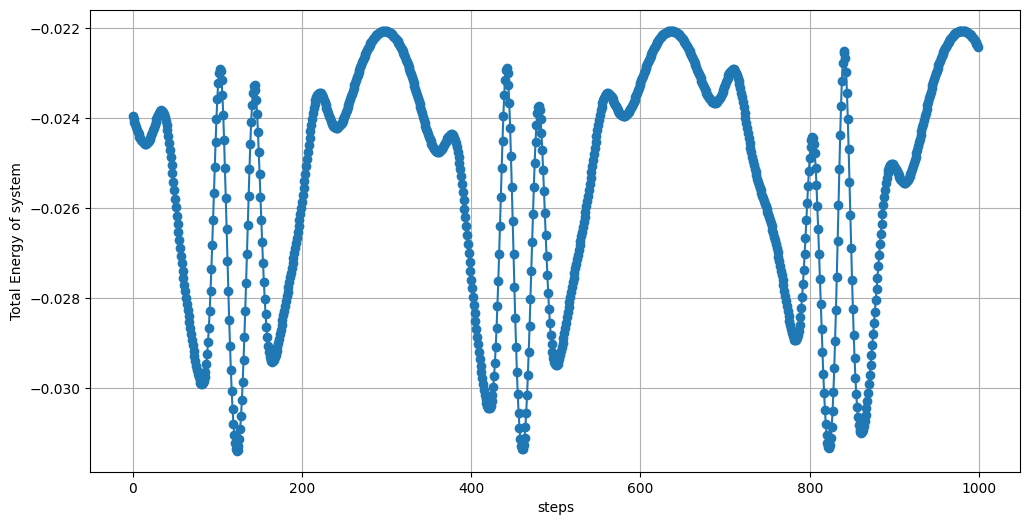

In [114]:
TotE_system = pe_system+ ke_system
plt.figure(figsize=(12,6))
plt.plot(TotE_system, marker = 'o')
plt.xlabel('steps')
plt.ylabel('Total Energy of system')
plt.grid()
plt.show()